In [132]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "simple_white"
colorscale = px.colors.sequential.Plasma
colorscale = [colorscale[0]] + colorscale[3:8]

#for no gaps between histogram bars:
#fig.update_traces(marker_line_width=0) 
#fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

#plotly libraries
import plotly.express as px
import plotly.colors as pc
import plotly.graph_objects as go
import plotly.io as pio

import os
import pandas as pd
import numpy as np
from Bio import SeqIO

#default renderer (svg means very small file size, visibility on github, high quality, but requires sometimes setting height and width)
#pio.renderers.default = "jupyterlab"
pio.renderers.default = "svg"
colors = ["#363b3d", "#727b76", "#31a240", "#f93939", "#f79118", "#de7b06", "#9b308f", "#dc759b"]
#additional defaults
px.defaults.color_discrete_sequence = ["rgb(100,100,100)"] + pc.qualitative.D3
px.defaults.width=1000
px.defaults.height=500

#set default template as "simple_white" (no background, no grid lines)
pio.templates["simple_white"].layout["yaxis"]["showgrid"] = True
pio.templates["simple_white"].layout["xaxis"]["showgrid"] = True
pio.templates.default = "simple_white"

In [133]:
import pandas as pd

In [134]:
from plotly.validators.scatter.marker import SymbolValidator

raw_symbols = SymbolValidator().values

In [135]:
working_conditions = pd.read_excel("Excel_sheet_working_conditions.xlsx", keep_default_na=False, na_values=['_'], engine="openpyxl")

In [136]:
working_conditions["class"].value_counts()

mRNA         15
Influenza    11
HIV           6
IVT           3
rRNA          1
Name: class, dtype: int64

In [137]:
color_dict = {"mRNA" : "green", "Influenza" : "purple", "HIV" : "blue", "IVT" : "orange", "rRNA" : "red"}

['diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'x-thin', 'x-thin', 'x-thin']
11
11


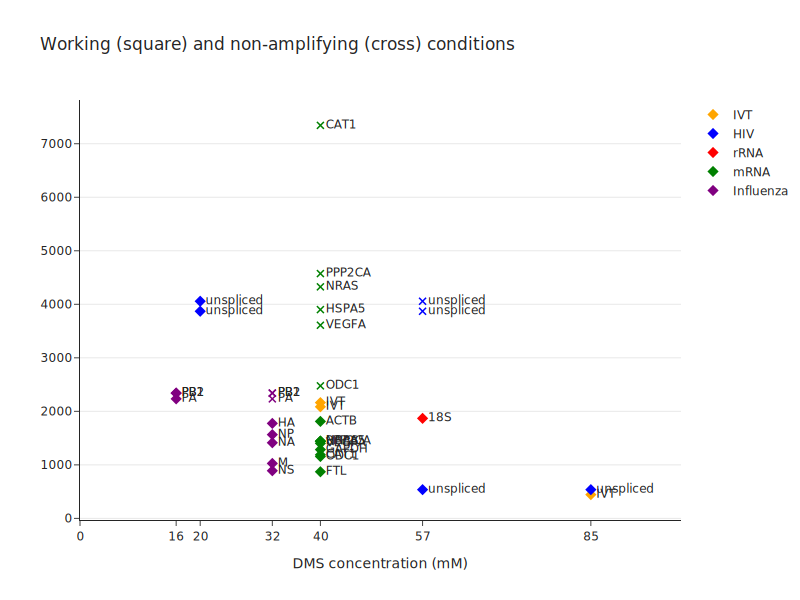

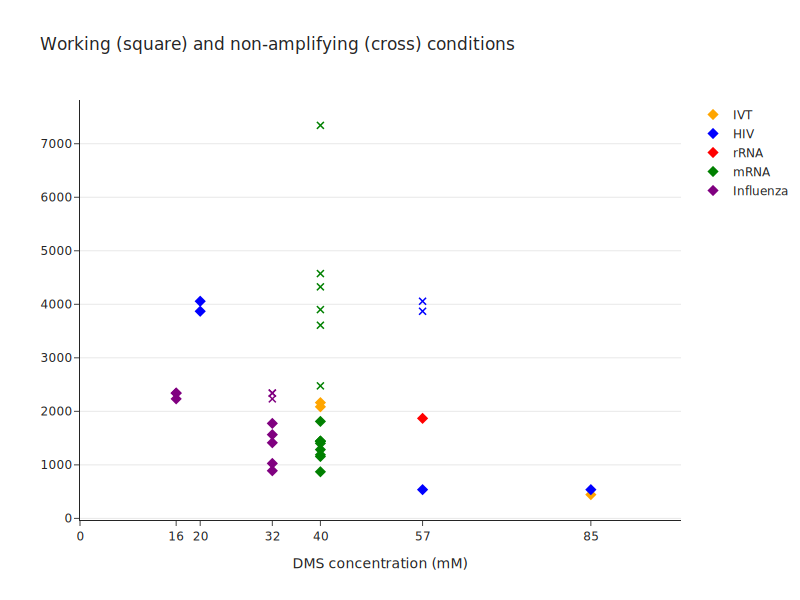

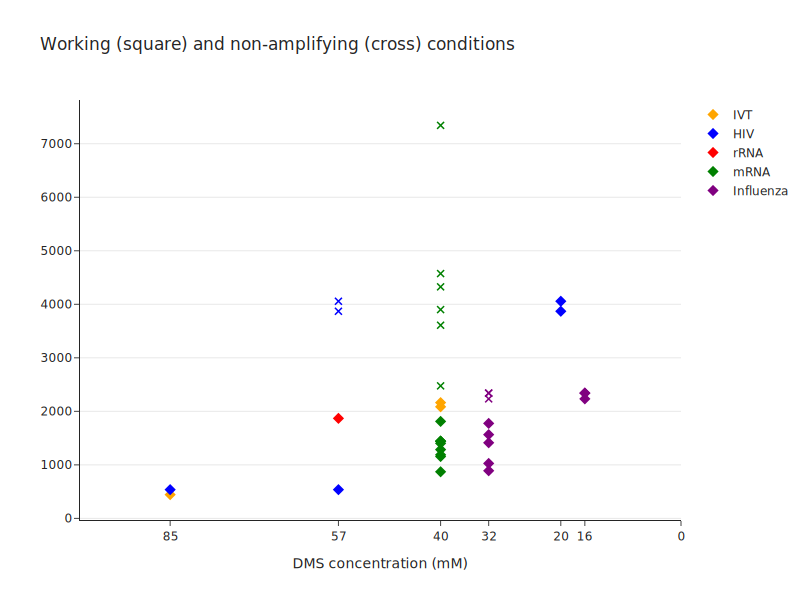

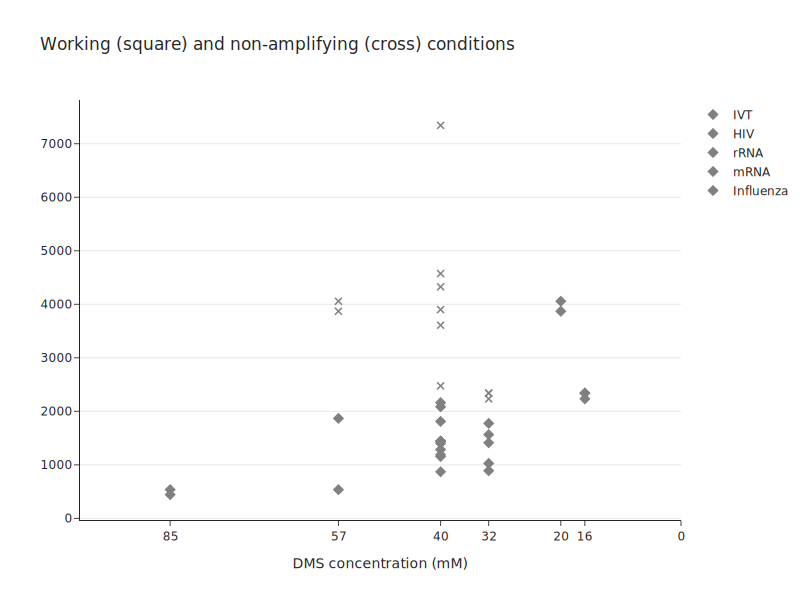

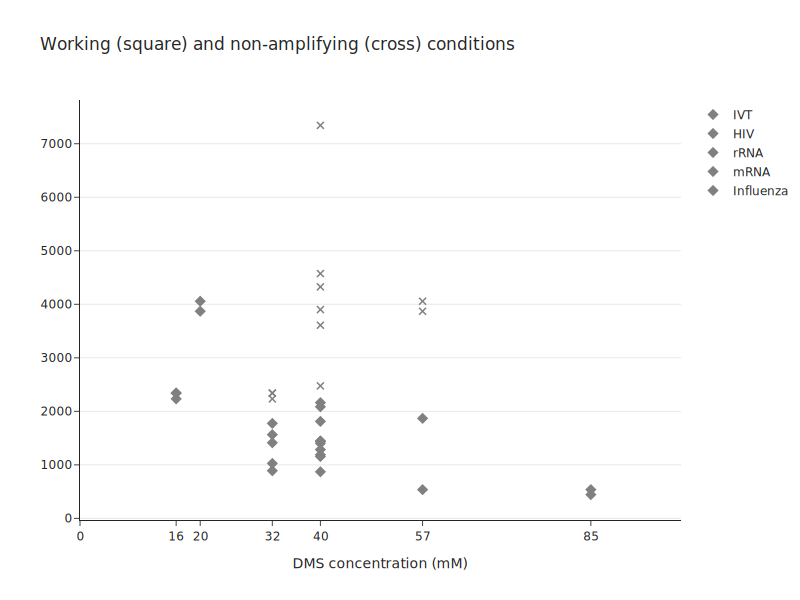

In [361]:
fig = go.Figure()


for RNA_class in working_conditions["class"].unique():
    x = []
    y = []
    symbols = []
    colors = []
    labels = []

    for working in [True, False]:
        sub_df = working_conditions[(working_conditions["success"] == working) & (working_conditions["class"] == RNA_class)]
        x = x + list(sub_df["DMS conc"].values)
        y = y + list(sub_df["length"].values)
        labels = labels + list(sub_df["short_descr"].values)
        classes = classes + list(sub_df["class"].values)
        colors = colors + [color_dict[RNA_class]]*len(sub_df)
        if working:
            symbols = symbols + ["diamond"]*len(sub_df)

        else:
            symbols = symbols + ["x-thin"]*len(sub_df)
    fig.add_trace(
        go.Scatter(mode="markers+text", x=x, y=y, marker_symbol=symbols,
            marker_color=colors, marker_line_color = colors, text=labels, textposition="middle right", name=RNA_class)
    )

print(symbols)
print(len(symbols))
print(len(x))
fig.update_xaxes(title="DMS concentration (mM)", range=[0,100],showgrid=False,  tickmode="array", tickvals= [0,16,20,32,40,57,85])
#fig.update_yaxes(type="log")
fig.update_traces(marker_size = 7, marker_line_width=1.5)
fig.update_layout(width=800, height=600, title="Working (square) and non-amplifying (cross) conditions")
fig.write_image("figures/working_conditions_colored_by_class.svg")
fig.show()
fig.update_traces(mode="markers")
fig.write_image("figures/working_conditions_colored_by_class_no_text.svg")
fig.show()
fig.update_xaxes(range=[100,0])
fig.write_image("figures/working_conditions_colored_by_class_no_text_x_reversed.svg")
fig.show()
fig.update_traces(marker_color="grey", marker_line_color="grey")
fig.write_image("figures/working_conditions_grey_no_text_x_reversed.svg")
fig.show()
fig.update_xaxes(range=[0,100])
fig.write_image("figures/working_conditions_grey_no_text.svg")
fig.show()


['diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'diamond', 'x-thin', 'x-thin', 'x-thin']
11
11


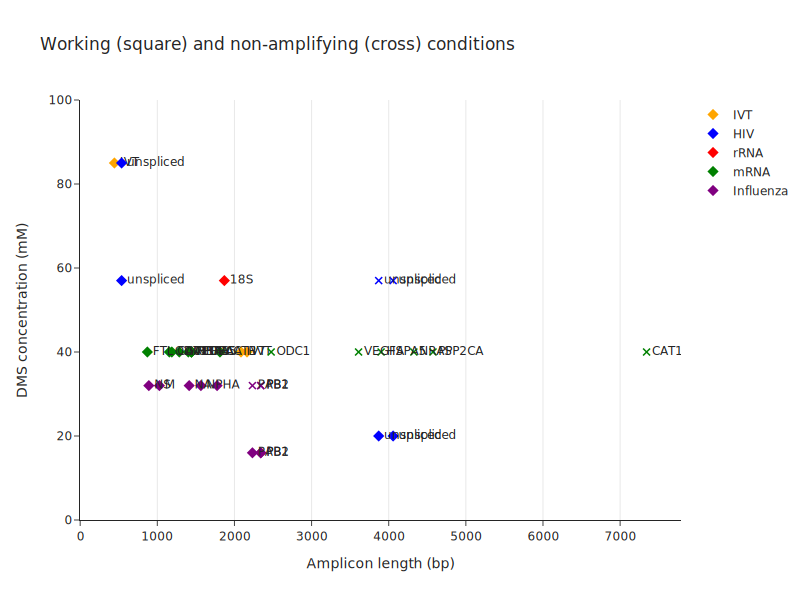

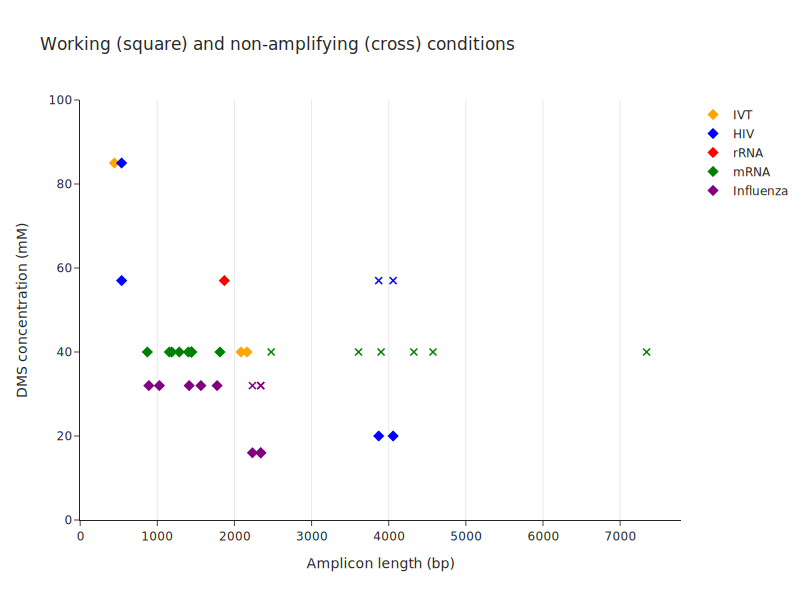

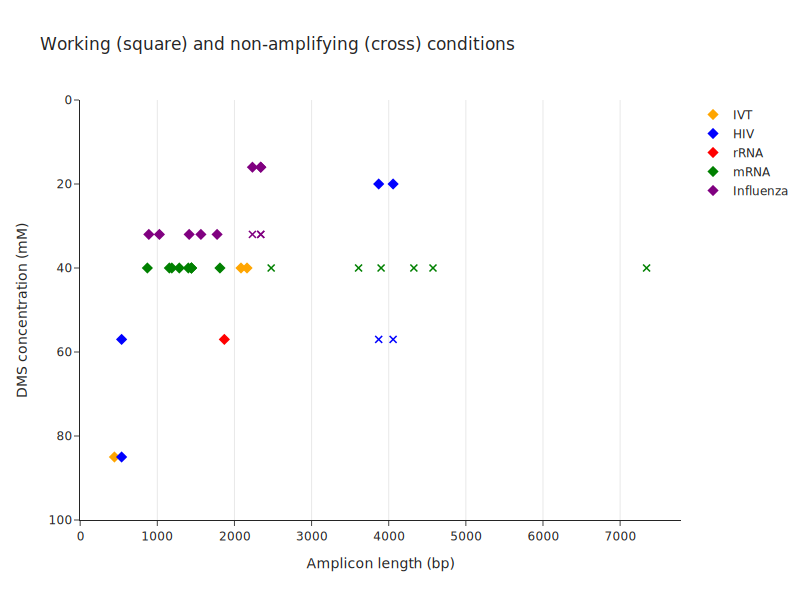

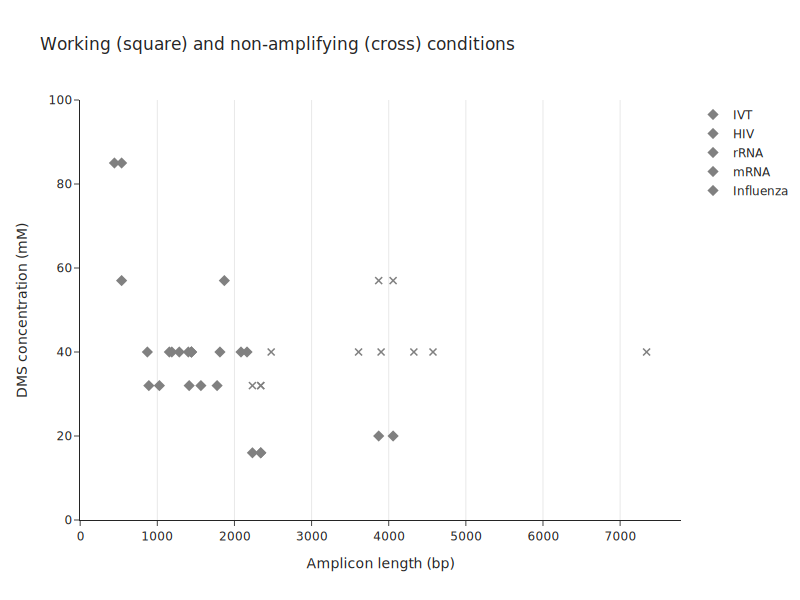

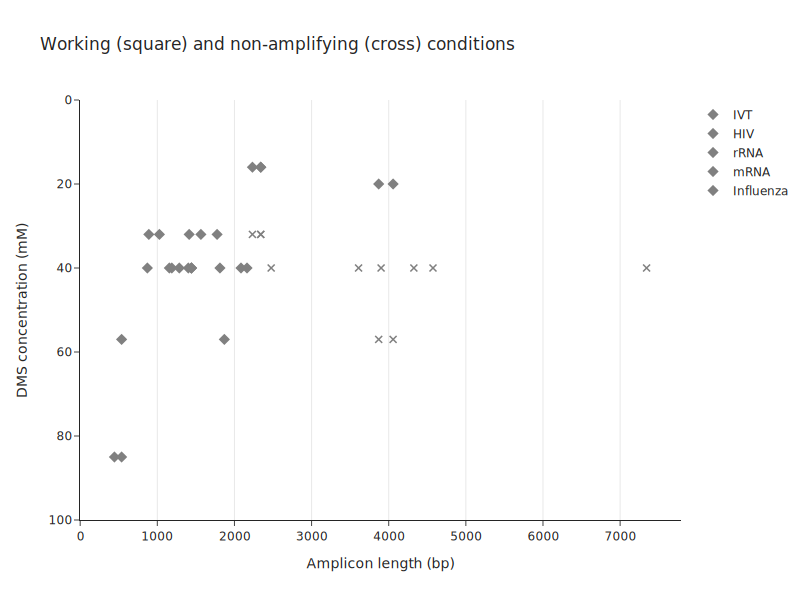

In [263]:
fig = go.Figure()


for RNA_class in working_conditions["class"].unique():
    x = []
    y = []
    symbols = []
    colors = []
    labels = []

    for working in [True, False]:
        sub_df = working_conditions[(working_conditions["success"] == working) & (working_conditions["class"] == RNA_class)]
        y = y + list(sub_df["DMS conc"].values)
        x = x + list(sub_df["length"].values)
        labels = labels + list(sub_df["short_descr"].values)
        classes = classes + list(sub_df["class"].values)
        colors = colors + [color_dict[RNA_class]]*len(sub_df)
        if working:
            symbols = symbols + ["diamond"]*len(sub_df)

        else:
            symbols = symbols + ["x-thin"]*len(sub_df)
    fig.add_trace(
        go.Scatter(mode="markers+text", x=x, y=y, marker_symbol=symbols,
            marker_color=colors, marker_line_color = colors, text=labels, textposition="middle right", name=RNA_class)
    )

print(symbols)
print(len(symbols))
print(len(x))
fig.update_yaxes(title="DMS concentration (mM)", range=[0,100],showgrid=False)
#fig.update_yaxes(tickmode="array", tickvals= [0,16,20,32,40,57,85])
fig.update_xaxes(title="Amplicon length (bp)")
#fig.update_yaxes(type="log")
fig.update_traces(marker_size = 7, marker_line_width=1.5)
fig.update_layout(width=800, height=600, title="Working (square) and non-amplifying (cross) conditions")
fig.write_image("figures/read_length_on_x_working_conditions_colored_by_class.svg")
fig.show()
fig.update_traces(mode="markers")
fig.write_image("figures/read_length_on_x_working_conditions_colored_by_class_no_text.svg")
fig.show()
fig.update_yaxes(range=[100,0])
fig.write_image("figures/read_length_on_x_working_conditions_colored_by_class_no_text_x_reversed.svg")
fig.show()
fig.update_traces(marker_color="grey", marker_line_color="grey")
fig.update_yaxes(range=[0,100])
fig.write_image("figures/read_length_on_x_working_conditions_grey_no_text.svg")
fig.show()
fig.update_yaxes(range=[100,0])
fig.write_image("figures/read_length_on_x_working_conditions_grey_no_text_x_reversed.svg")
fig.show()


['asterisk', 'asterisk', 'asterisk', 'asterisk', 'asterisk', 'asterisk', 'asterisk', 'asterisk', 'asterisk', 'asterisk', 'asterisk']
11
11


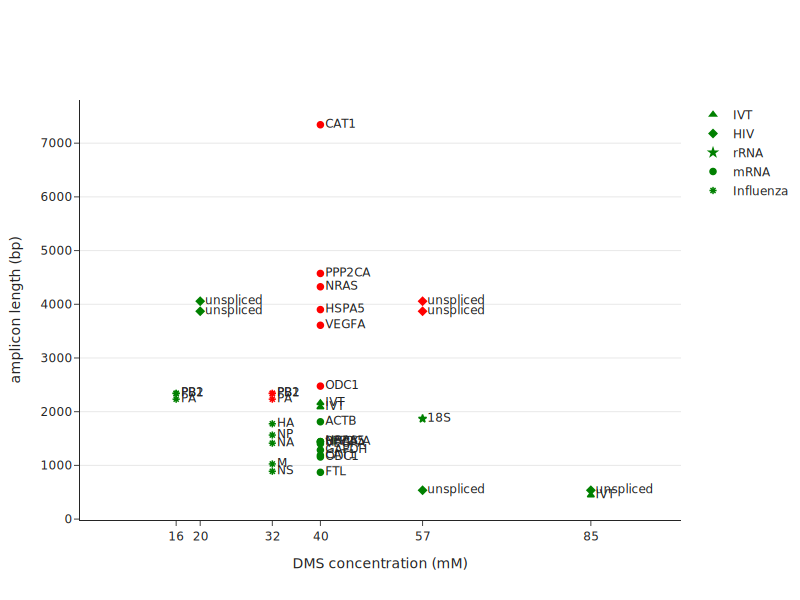

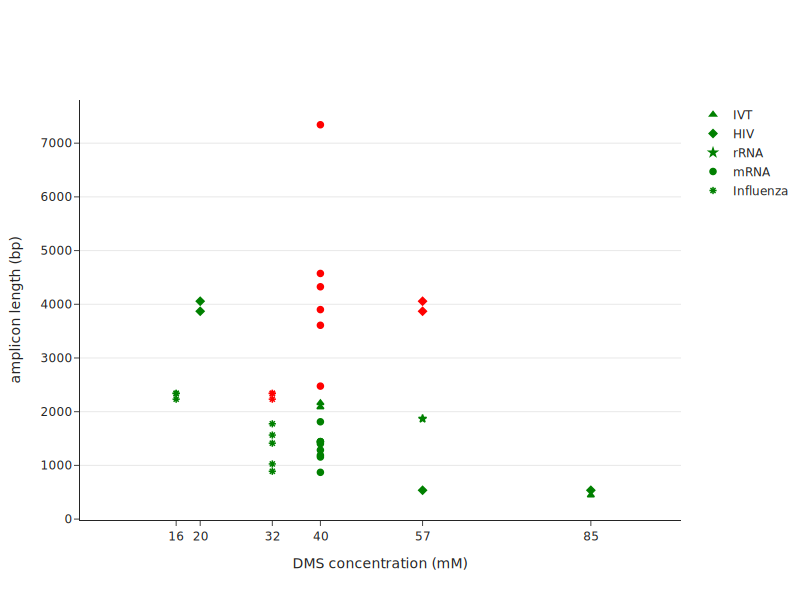

In [140]:
symbol_dict = {"mRNA" : "circle", 
               "Influenza" : "asterisk", 
               "HIV" : "diamond", 
               "IVT" : "triangle-up", 
               "rRNA" : "star"}

fig = go.Figure()


for RNA_class in working_conditions["class"].unique():
    x = []
    y = []
    symbols = []
    colors = []
    labels = []

    for working in [True, False]:
        sub_df = working_conditions[(working_conditions["success"] == working) & (working_conditions["class"] == RNA_class)]
        x = x + list(sub_df["DMS conc"].values)
        y = y + list(sub_df["length"].values)
        labels = labels + list(sub_df["short_descr"].values)
        classes = classes + list(sub_df["class"].values)
        symbols = symbols + [symbol_dict[RNA_class]]*len(sub_df)
        #colors = colors + [color_dict[RNA_class]]*len(sub_df)
        if working:
            #symbols = symbols + ["circle"]*len(sub_df)
            colors = colors + ["green"]*len(sub_df)
        else:
            #symbols = symbols + ["x"]*len(sub_df)
            colors = colors + ["red"]*len(sub_df)
    fig.add_trace(
        go.Scatter(mode="markers+text", x=x, y=y, marker_symbol=symbols,
            marker_color=colors, marker_line_color=colors, text=labels, textposition="middle right", name=RNA_class)
    )

print(symbols)
print(len(symbols))
print(len(x))
fig.update_xaxes(title="DMS concentration (mM)", range=[0,100],showgrid=False,  tickmode="array", tickvals= [16,20,32,40,57,85])
fig.update_yaxes(title="amplicon length (bp)")
#fig.update_yaxes(type="log")
fig.update_traces(marker_size = 6,marker_line_width=1.5)
fig.update_layout(width=800, height=600)
fig.write_image("figures/working_conditions.svg")
fig.show()
fig.update_traces(mode="markers")
fig.write_image("figures/working_conditions_no_text.svg")
fig.show()

# Plot estimated required coverage based on subsampling data

In [142]:
subsampling_df = pd.read_pickle("data/subsampling_data_paper_nanopore_ndni_eq10_position_qscore.pickle.gz")

In [145]:
optimal_df = subsampling_df[subsampling_df["setting"] == "_nd_ni_eq10_q22"]

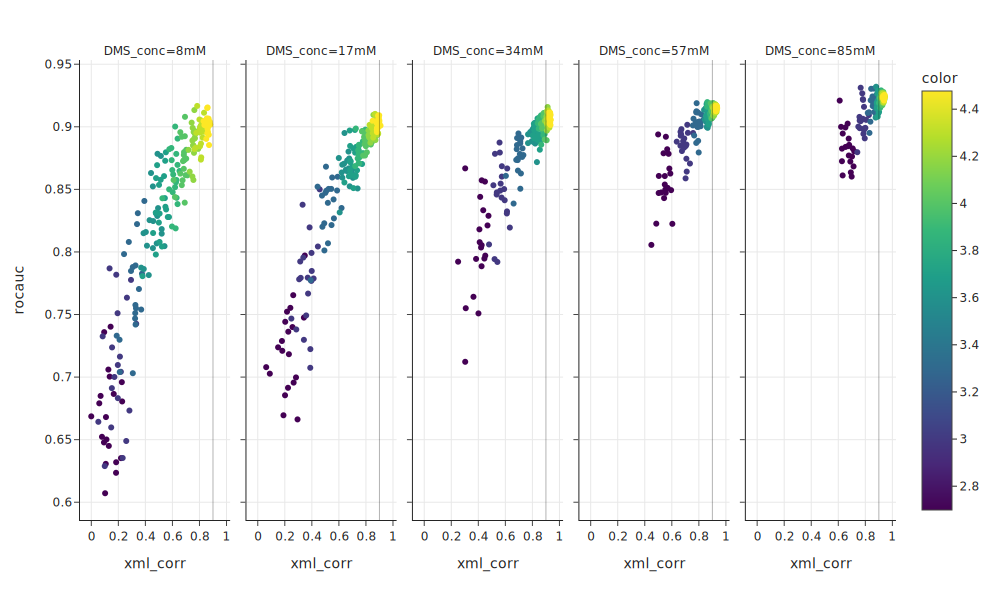

In [376]:
fig = px.scatter(optimal_df, x="xml_corr", y="rocauc", facet_col = "DMS_conc", color=np.log10(optimal_df["subsample_size"]))
fig.update_layout(width=1000, height=600)
fig.update_xaxes(dtick=0.2)
fig.add_vline(x=0.9, line_width=1, line_color="black")
fig.show()

## Estimate rocauc=0.9 intercept for subsampling sizes

8mM median: 26723
8mM mean: 28106
8mM min: 42552
8mM max: 7479


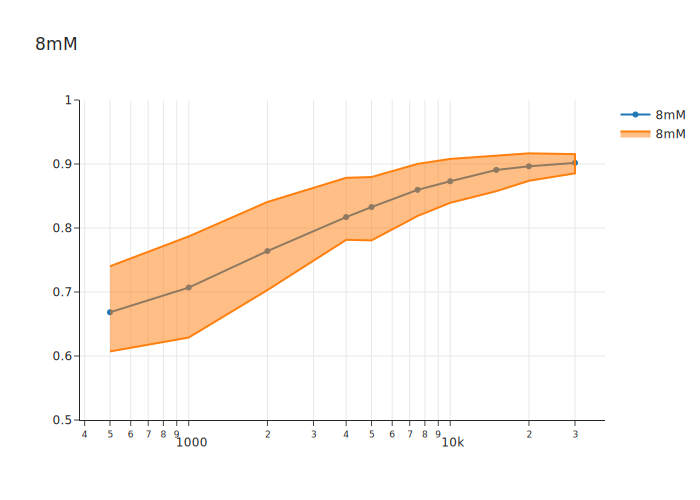

17mM median: 20271
17mM mean: 20971
17mM min: 39451
17mM max: 10479


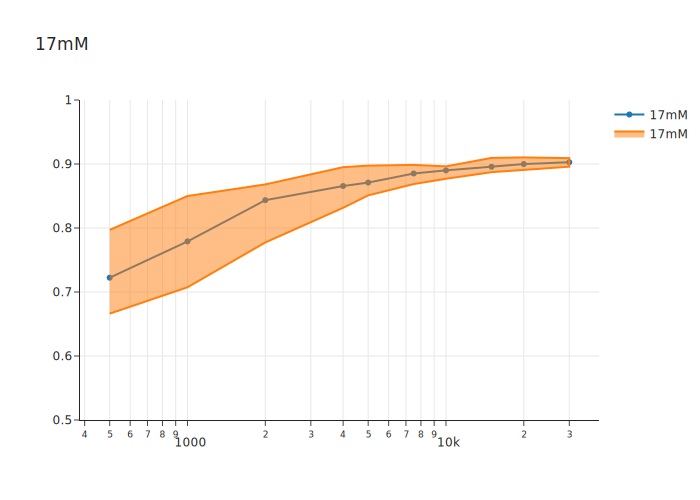

34mM median: 8223
34mM mean: 6917
34mM min: 23200
34mM max: 3253


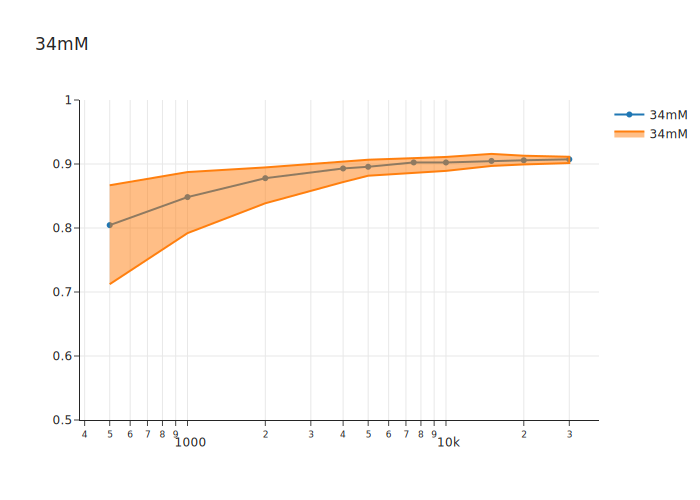

57mM median: 1799
57mM mean: 1871
57mM min: 4322
57mM max: 896


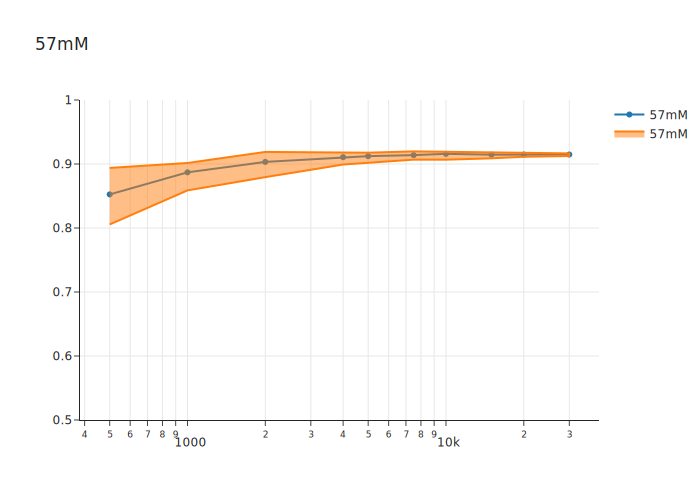

85mM median: 884
85mM mean: 869
85mM min: 2797
85mM max: -141390


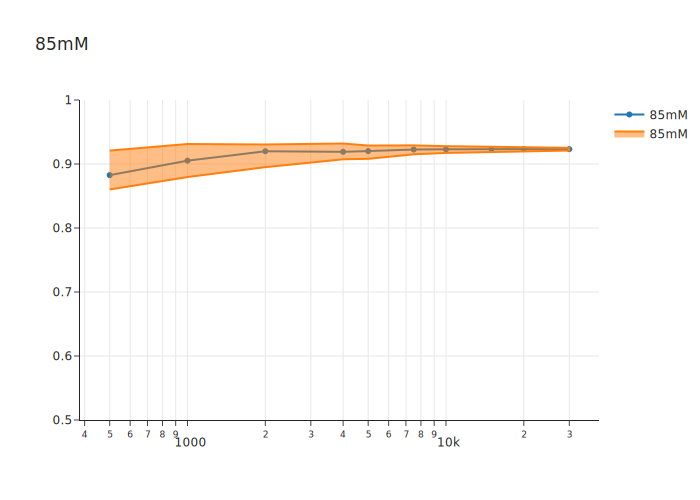

In [307]:
# estimating expected mean required coverage
from scipy import interpolate

tmp_data = []


for DMS_conc in ["8mM", "17mM", "34mM", "57mM", "85mM"]:
    fig = go.Figure()
    sub_df = optimal_df[optimal_df["DMS_conc"] == DMS_conc]
    sub_sub_df = sub_df.groupby("subsample_size").agg({"rocauc" : ["min", "mean", "max", "median"]}).reset_index()
    sub_sub_df.columns = ["subsample_size", "min", "mean", "max", "median"]
    sub_sub_df = sub_sub_df.sort_values(by="subsample_size")
    x = list(sub_sub_df["subsample_size"].values)
    y = sub_sub_df["median"].values
    y_min = list(sub_sub_df["min"].values)
    y_max = list(sub_sub_df["max"].values)
    
    f = interpolate.interp1d(y, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "median"))
    print(DMS_conc, "median:", int(min_req_coverage_estimate))
    
    f = interpolate.interp1d(sub_sub_df["mean"].values, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "mean"))
    print(DMS_conc, "mean:", int(min_req_coverage_estimate))
    
    f = interpolate.interp1d(y_min, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "min"))
    print(DMS_conc, "min:", int(min_req_coverage_estimate))
    
    f = interpolate.interp1d(y_max, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "max"))
    print(DMS_conc, "max:", int(min_req_coverage_estimate))
    
    
    fig.add_trace(go.Scatter(x=x, y=y, name=f"{DMS_conc}"))
    fig.add_trace(go.Scatter(x=x + x[::-1], y=y_max + y_min[::-1], fill="toself", name=f"{DMS_conc}"))
    
    
    #fig.add_trace(go.Scattergl(x=x_fitted, y=y_fitted, name="fit"))
        #fig.add_vline(x=min_req_coverage_estimate, line_width=3, line_color="black",name=DMS_conc, annotation_text = int(min_req_coverage_estimate))
    fig.update_layout(title=DMS_conc)
    fig.update_xaxes(type="log")
    fig.update_yaxes(range = [0.5,1])
    fig.show()

In [308]:
# estimating expected mean required coverage
from scipy import interpolate

tmp_data = []


for DMS_conc in ["8mM", "17mM", "34mM", "57mM", "85mM"]:
    fig = go.Figure()
    sub_df = optimal_df[optimal_df["DMS_conc"] == DMS_conc]
    for iteration in sub_df["i"].unique():
        sub_sub_df = sub_df[sub_df["i"] == iteration]

        sub_sub_df = sub_sub_df.sort_values(by="subsample_size")
        x = list(sub_sub_df["subsample_size"].values)
        y= sub_sub_df["rocauc"].values

        f = interpolate.interp1d(y, x, fill_value = "extrapolate")
        min_req_coverage_estimate = f(0.9)
        tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration))
        print(DMS_conc, "iteration", int(min_req_coverage_estimate))



8mM iteration 21571
8mM iteration 26472
8mM iteration 29111
8mM iteration 18682
8mM iteration 29233
8mM iteration 21801
8mM iteration 36400
8mM iteration 26950
8mM iteration 21302
8mM iteration 65275
8mM iteration 28422
8mM iteration 7474
8mM iteration 36150
8mM iteration 33541
8mM iteration 19492
8mM iteration 41999
8mM iteration 15647
8mM iteration 24989
8mM iteration 15258
8mM iteration 63230
17mM iteration 16067
17mM iteration 26661
17mM iteration 29727
17mM iteration 28559
17mM iteration 13475
17mM iteration 25462
17mM iteration 16576
17mM iteration 19833
17mM iteration 31271
17mM iteration 26133
17mM iteration 54444
17mM iteration 14555
17mM iteration 27844
17mM iteration 19926
17mM iteration 10133
17mM iteration 13156
17mM iteration 19625
17mM iteration 25812
17mM iteration 19103
17mM iteration 22550
34mM iteration 11750
34mM iteration 8184
34mM iteration 14863
34mM iteration 4084
34mM iteration 7685
34mM iteration 4515
34mM iteration 6339
34mM iteration 11188
34mM iteration 725

In [309]:
min_req_cov_df = pd.DataFrame(tmp_data, columns = ["DMS_conc", "coverage", "iteration"])

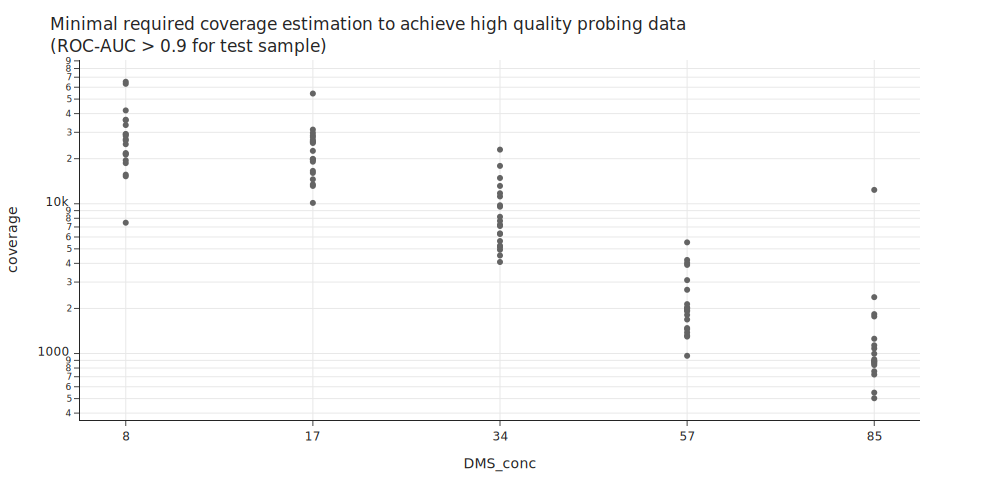

In [344]:
fig = px.scatter(min_req_cov_df[min_req_cov_df["coverage"] > 0], x="DMS_conc", y="coverage")
fig.update_layout(title = "Minimal required coverage estimation to achieve high quality probing data<br>(ROC-AUC > 0.9 for test sample)")
#fig.update_xaxes(range=[0,100], autorange="reversed")
#fig.update_yaxes(range=[0,34000])
fig.update_yaxes(type="log")
fig.update_xaxes(type="category")
#fig.update_yaxes(type="log", range = [2,5])
fig.show()

In [352]:
min_req_cov_df["DMS_conc"] = min_req_cov_df["DMS_conc"].astype("category")

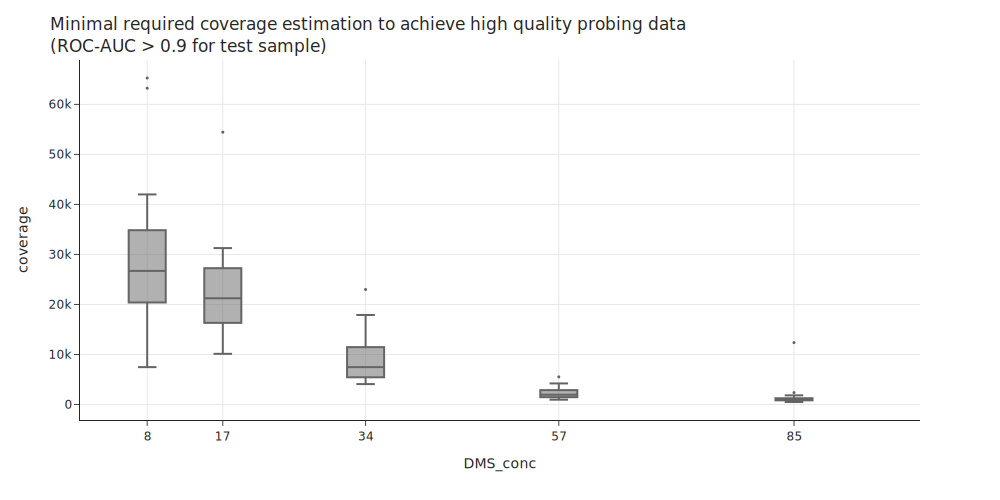

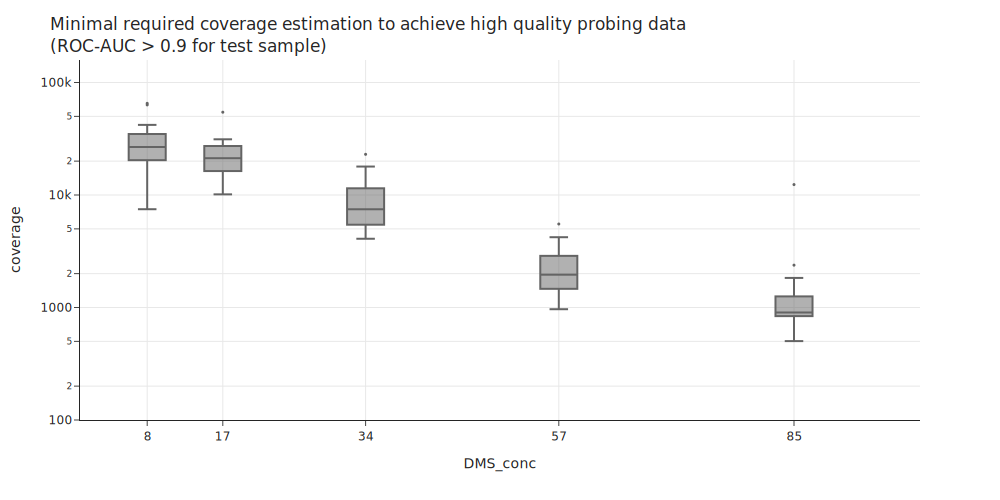

In [358]:
fig = px.box(min_req_cov_df[min_req_cov_df["coverage"] > 0], x="DMS_conc", y="coverage")
fig.update_layout(title = "Minimal required coverage estimation to achieve high quality probing data<br>(ROC-AUC > 0.9 for test sample)")
#fig.update_xaxes(range=[0,100], autorange="reversed")
#fig.update_yaxes(range=[0,34000])
#fig.update_yaxes(type="log")
fig.update_traces(marker_size=3)
#fig.update_xaxes(type=int)
#fig.update_yaxes(type="log", range = [2,5])
fig.update_xaxes(range=[0,100], tickvals = [8, 17, 34, 57, 85])
fig.write_image("figures/min_req_coverage_estimation_from_subsampling.svg")
fig.show()
fig.update_yaxes(type="log", range=[2,5.2])
fig.write_image("figures/min_req_log_coverage_estimation_from_subsampling.svg")
fig.show()


## Estimate xml_corr=0.9 intercept for subsampling_sizees

8mM median: 38049
8mM mean: 37472
8mM min: 40528
8mM max: 36132


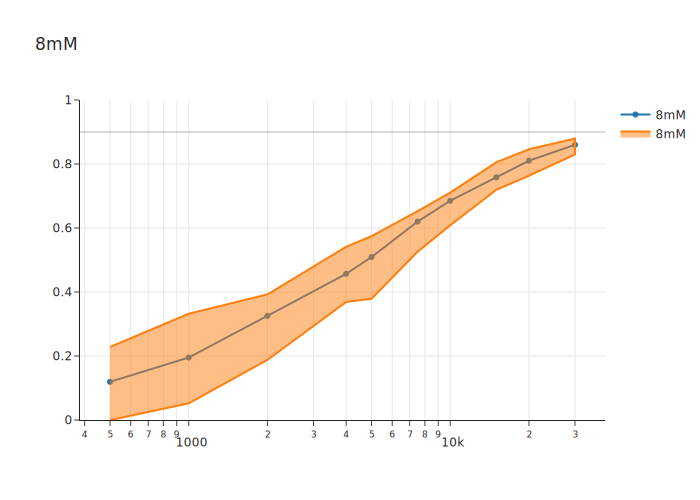

17mM median: 34048
17mM mean: 34893
17mM min: 52544
17mM max: 24646


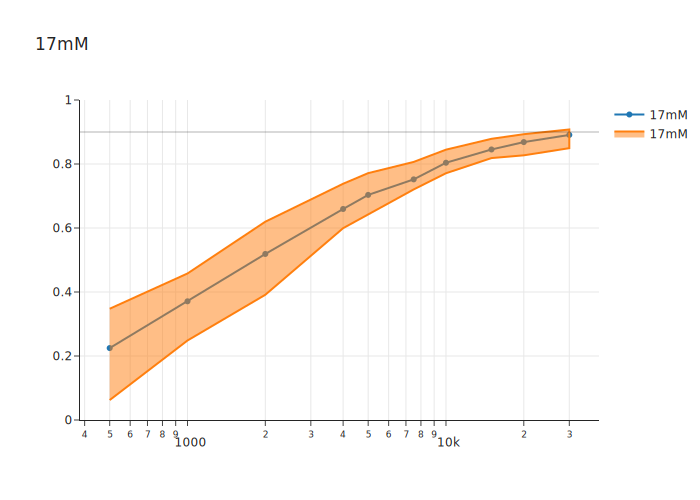

34mM median: 12491
34mM mean: 12849
34mM min: 17220
34mM max: 8971


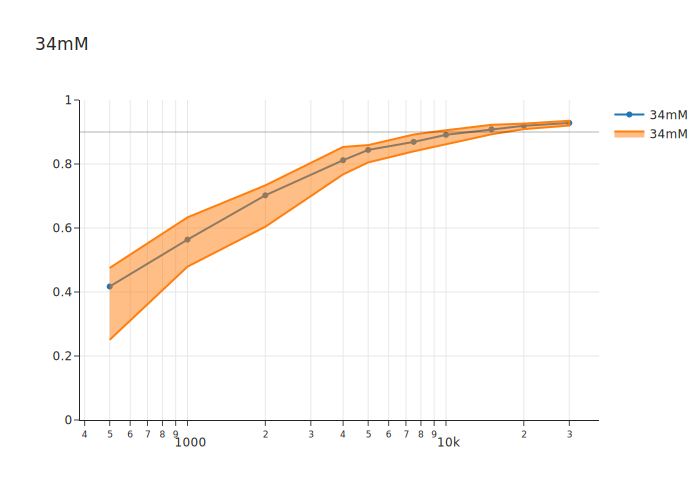

57mM median: 8945
57mM mean: 9163
57mM min: 14655
57mM max: 5162


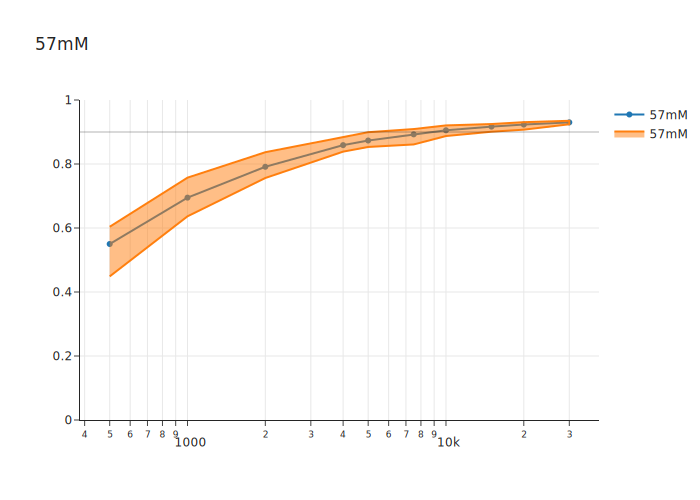

85mM median: 4607
85mM mean: 4636
85mM min: 7368
85mM max: 3311


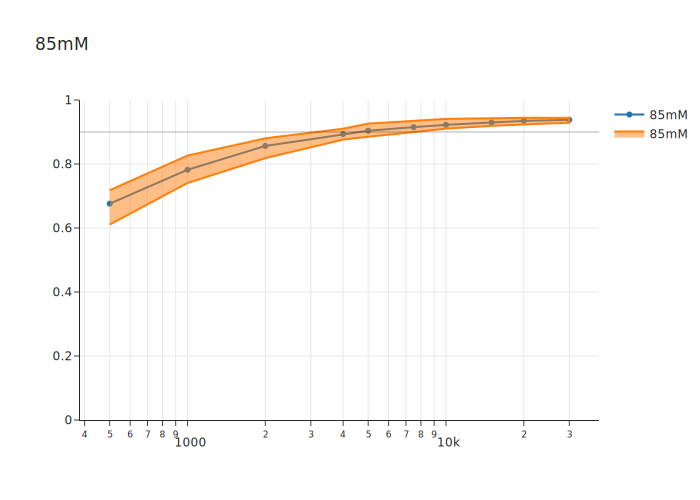

In [379]:
# estimating expected mean required coverage
from scipy import interpolate

tmp_data = []


for DMS_conc in ["8mM", "17mM", "34mM", "57mM", "85mM"]:
    fig = go.Figure()
    sub_df = optimal_df[optimal_df["DMS_conc"] == DMS_conc]
    sub_sub_df = sub_df.groupby("subsample_size").agg({"xml_corr" : ["min", "mean", "max", "median"]}).reset_index()
    sub_sub_df.columns = ["subsample_size", "min", "mean", "max", "median"]
    sub_sub_df = sub_sub_df.sort_values(by="subsample_size")
    x = list(sub_sub_df["subsample_size"].values)
    y = sub_sub_df["median"].values
    y_min = list(sub_sub_df["min"].values)
    y_max = list(sub_sub_df["max"].values)
    
    f = interpolate.interp1d(y, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "median"))
    print(DMS_conc, "median:", int(min_req_coverage_estimate))
    
    f = interpolate.interp1d(sub_sub_df["mean"].values, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "mean"))
    print(DMS_conc, "mean:", int(min_req_coverage_estimate))
    
    f = interpolate.interp1d(y_min, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "min"))
    print(DMS_conc, "min:", int(min_req_coverage_estimate))
    
    f = interpolate.interp1d(y_max, x, fill_value = "extrapolate")
    min_req_coverage_estimate = f(0.9)
    tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration, "max"))
    print(DMS_conc, "max:", int(min_req_coverage_estimate))
    
    
    fig.add_trace(go.Scatter(x=x, y=y, name=f"{DMS_conc}"))
    fig.add_trace(go.Scatter(x=x + x[::-1], y=y_max + y_min[::-1], fill="toself", name=f"{DMS_conc}"))
    
    
    #fig.add_trace(go.Scattergl(x=x_fitted, y=y_fitted, name="fit"))
        #fig.add_vline(x=min_req_coverage_estimate, line_width=3, line_color="black",name=DMS_conc, annotation_text = int(min_req_coverage_estimate))
    fig.update_layout(title=DMS_conc)
    fig.update_xaxes(type="log")
    fig.add_hline(y=0.9, line_width=1, line_color="black")
    fig.update_yaxes(range = [0,1])
    fig.show()

In [381]:
# estimating expected mean required coverage
from scipy import interpolate

tmp_data = []


for DMS_conc in ["8mM", "17mM", "34mM", "57mM", "85mM"]:
    fig = go.Figure()
    sub_df = optimal_df[optimal_df["DMS_conc"] == DMS_conc]
    for iteration in sub_df["i"].unique():
        sub_sub_df = sub_df[sub_df["i"] == iteration]

        sub_sub_df = sub_sub_df.sort_values(by="subsample_size")
        x = list(sub_sub_df["subsample_size"].values)
        y= sub_sub_df["xml_corr"].values

        f = interpolate.interp1d(y, x, fill_value = "extrapolate")
        min_req_coverage_estimate = f(0.9)
        tmp_data.append((int(DMS_conc.replace("mM", "")),min_req_coverage_estimate , iteration))
        #print(DMS_conc, "iteration", int(min_req_coverage_estimate))



In [382]:
min_req_cov_df = pd.DataFrame(tmp_data, columns = ["DMS_conc", "coverage", "iteration"])

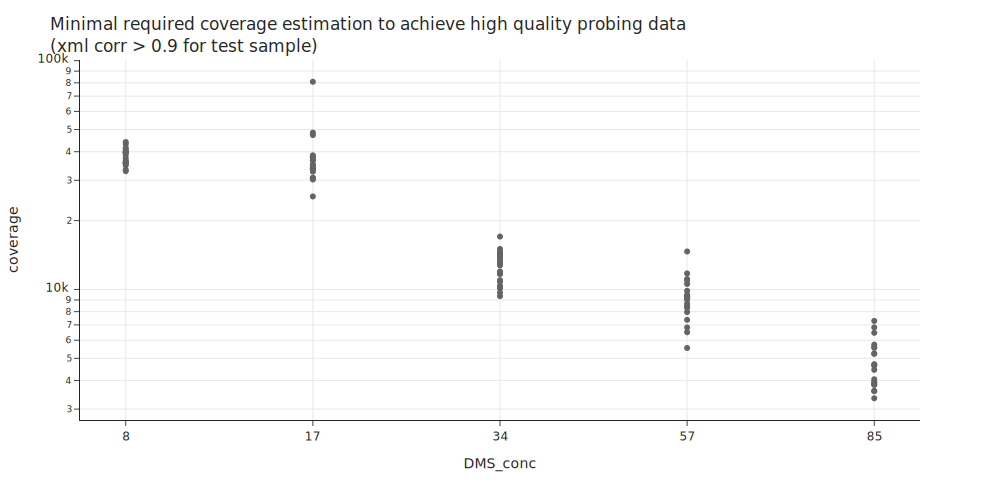

In [383]:
fig = px.scatter(min_req_cov_df[min_req_cov_df["coverage"] > 0], x="DMS_conc", y="coverage")
fig.update_layout(title = "Minimal required coverage estimation to achieve high quality probing data<br>(xml corr > 0.9 for test sample)")
#fig.update_xaxes(range=[0,100], autorange="reversed")
#fig.update_yaxes(range=[0,34000])
fig.update_yaxes(type="log")
fig.update_xaxes(type="category")
#fig.update_yaxes(type="log", range = [2,5])
fig.show()

In [384]:
min_req_cov_df["DMS_conc"] = min_req_cov_df["DMS_conc"].astype("category")

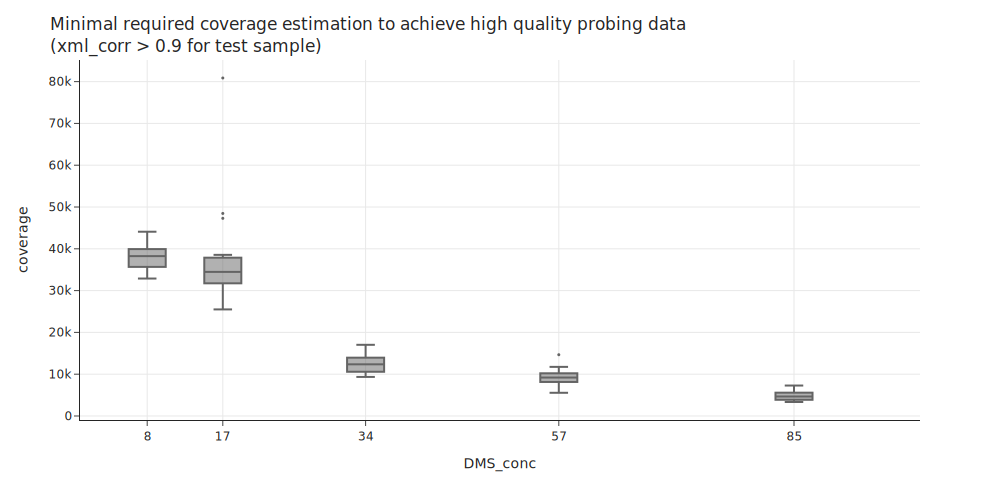

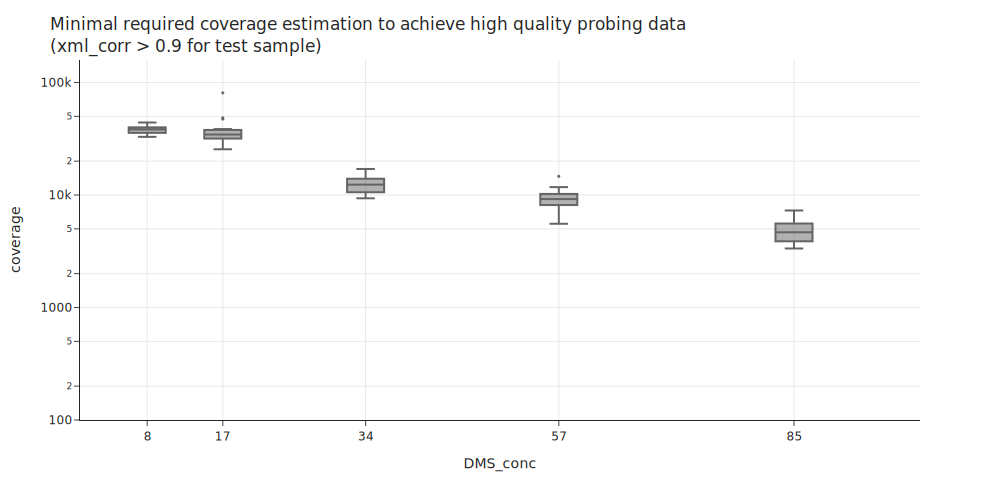

In [385]:
fig = px.box(min_req_cov_df[min_req_cov_df["coverage"] > 0], x="DMS_conc", y="coverage")
fig.update_layout(title = "Minimal required coverage estimation to achieve high quality probing data<br>(xml_corr > 0.9 for test sample)")
#fig.update_xaxes(range=[0,100], autorange="reversed")
#fig.update_yaxes(range=[0,34000])
#fig.update_yaxes(type="log")
fig.update_traces(marker_size=3)
#fig.update_xaxes(type=int)
#fig.update_yaxes(type="log", range = [2,5])
fig.update_xaxes(range=[0,100], tickvals = [8, 17, 34, 57, 85])
fig.write_image("figures/min_req_coverage_estimation_from_subsampling.svg")
fig.show()
fig.update_yaxes(type="log", range=[2,5.2])
fig.write_image("figures/min_req_log_coverage_estimation_from_subsampling.svg")
fig.show()


8mM : 28106
17mM : 20971
34mM : 6917
57mM : 1871
85mM : 869


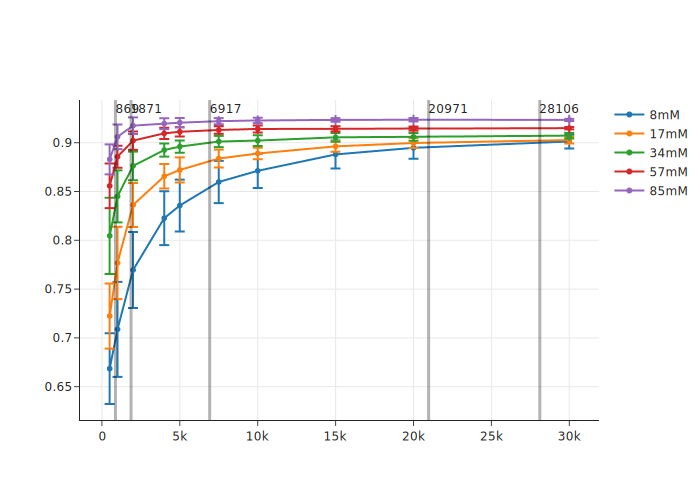

In [267]:
# estimating expected minimal required coverage

fig = go.Figure()
for DMS_conc in ["8mM", "17mM", "34mM", "57mM", "85mM"]:
    
    sub_df = optimal_df[optimal_df["DMS_conc"] == DMS_conc]
    sub_sub_df = sub_df.groupby("subsample_size").agg({"rocauc" : ["mean", "std", "min"]}).reset_index()
    sub_sub_df.columns = ["subsample_size", "mean", "std", "min"]
    x = sub_sub_df["subsample_size"].values
    y = sub_sub_df["mean"].values
    y_std = sub_sub_df["std"].values
    
    #linear interpolation
    min_req_coverage_estimate = np.interp([0.9],y, x)
    
    print(DMS_conc, ":", int(min_req_coverage_estimate[0]))
    
    fig.add_trace(go.Scattergl(x=x, y=y, error_y_array = y_std, name=DMS_conc))
    fig.add_vline(x=min_req_coverage_estimate[0], line_width=3, line_color="black",name=DMS_conc, annotation_text = int(min_req_coverage_estimate[0]))
fig.show()

In [362]:
optimal_df[["sample", "setting", "reactive_nt", "norm_option", "i", "subsample_size", "xml_corr", "rocauc"]]

,sample,transcript_id,length,sequence,reactivity,setting,reactive_nt,norm_option,i,subsample_size,xml_corr,rocauc,DMS_conc,location,q
6,RT1_8mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,1,500,0.126409,0.706008,8mM,cell,22
17,RT1_8mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,2,500,0.183831,0.631939,8mM,cell,22
28,RT1_8mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,3,500,0.112269,0.650136,8mM,cell,22
39,RT1_8mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,4,500,0.102205,0.607179,8mM,cell,22
50,RT1_8mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,5,500,-0.000310,0.668617,8mM,cell,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,RT1_85mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,16,30000,0.934325,0.922863,85mM,cell,22
10962,RT1_85mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,17,30000,0.944131,0.925218,85mM,cell,22
10973,RT1_85mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,18,30000,0.937972,0.921935,85mM,cell,22
10984,RT1_85mM_cell,RT1_unspliced1,544,GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTA...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",_nd_ni_eq10_q22,AC,,19,30000,0.938275,0.924076,85mM,cell,22


In [ ]:
optimal_df.to_excel()